In [3]:
# regression_demo_a_bx.ipynb
# 2023.08.09

import numpy as np
print(f'np.__version__ ={np.__version__}')
import pandas as pd
print(f'pd.__version__ ={pd.__version__}')
# import random
# import timeit
import time

np.__version__ =1.21.5
pd.__version__ =1.4.4


# Linear Regression $ y = a + b \cdot x $ and the corresponding Loss function.

The loss function for linear regression is typically defined as the mean squared error (MSE) between the predicted values and the actual values. For the linear model $ y = a + b \cdot x $, the loss function $ L(a, b) $ can be defined as:

$$
L(a, b) = \frac{1}{n} \sum_{i=1}^{n} \left( (a + b \cdot x_i) - y_i \right)^2
$$

Here, $ n $ is the number of data points, $ x_i $ is the $ i $-th value of the input data, and $ y_i $ is the $ i $-th value of the actual output data.



In [ ]:
# Loss function
def loss_function(a, b):
    return np.mean((a + b * x - y) ** 2)


def generate_data(w=[4,2] , N=10, addnoise=True, noise_scale=1):
  ''' generate N values (x,y) for the regression model y = a + bx
      input parameters w=[a,b], ie   a=w[0] and b=w[1] '''
  # parameters

  # Fixing random state for reproducibility
  np.random.seed(9)

  # domain [2,10]
  x = 2 + (10-2)*np.random.random_sample(size=N)
  x = np.sort(x)

  # values
  a, b = w[0], w[1]
  y = a + b*x
  if addnoise:
    noise = noise_scale*np.random.random_sample(size=N)
    y = y + noise

  import matplotlib.pyplot as plt
  # plt.scatter(x, y, s=100*noise, marker='o', c='red', alpha=0.5)
  plt.scatter(x, y, s=100, marker='o', c='red', alpha=0.5)
  plt.xlabel('x', size=20)
  plt.ylabel('y', size=20)
  plt.grid()

  return x, y

x=[2.08299323 2.67247721 3.07063623 3.13688868 3.74846941 3.98480935
 4.76398912 5.34806544 5.96618635 6.01499674]
y=[ 8.16598646  9.34495442 10.14127246 10.27377737 11.49693881 11.96961869
 13.52797824 14.69613089 15.93237269 16.02999347]


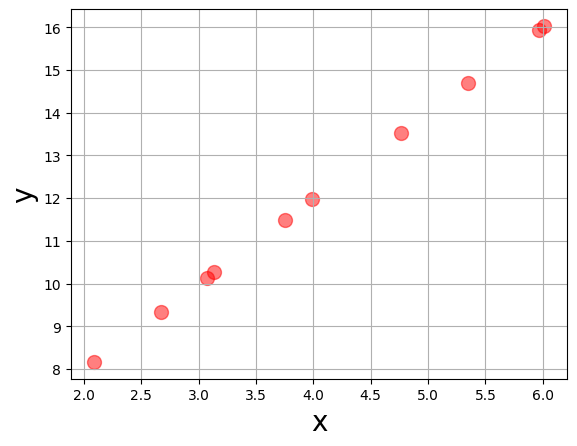

In [ ]:
# pd.DataFrame({'x':x, 'y':y})
x, y = generate_data(w=[4,2] , N=10, addnoise=True, noise_scale=0)

# show data we just generated
print(f'x={x}')
print(f'y={y}')

# DF for saving results of each method
res = pd.DataFrame(columns=['method','a','b','L','iterations', 'time'])
res_ix=0
# res

# LA approach: Normal Equation.

https://godatadriven.com/blog/the-linear-algebra-behind-linear-regression/

### Model $y = a + b x = [1,x]\begin{bmatrix} a\\ b\end{bmatrix}$

Our model has two parameters, $a$ and $b$.
Let $\vec{w}=\begin{bmatrix} a\\ b\end{bmatrix}$.


 $y_i \approx \hat{y}_i = a+bx_i =[1,x_i]\begin{bmatrix} a\\ b\end{bmatrix}
  = [1,x_i] \vec{w}$ , for $i=0,...,N-1$.


$y_i = (a+bx_i) + e_i$

Experimental data : $(x_i, y_i) $ for $i=0,...,(N-1)$.

Let
$X=\begin{bmatrix}
1 \quad x_0\\
1  \quad x_1\\
\dots\\
1   \quad x_{N-1}
\end{bmatrix}=[\vec{1}, \vec{x}] \quad $
and
$\quad Y=\begin{bmatrix}
y_0\\
y_1\\
\dots\\
y_{N-1}
\end{bmatrix}=\vec{y}$ .


Note that for any $\vec{w}=[a,b]^T$,
$\ X\vec{w} \ne \vec{y}$ because data is noisy: $\vec{y} =  X\vec{w} + \vec{e}$.

We need to find $w^*=\begin{bmatrix} a^* \\ b^* \end{bmatrix}$ that
best fits out experiemental data.

I.e., $y^* = X w^* =a^*\vec{1} + b^*\vec{x}$, is as close to $\vec{y}$ as possible.

Hence $y^*$ must be a projection of $\vec{y}$ onto $Span(X)=Span(\{\vec{1},\vec{x}\})$.




$$(y^*-\vec{y})^T X = [0,0]\\
X^T(y^*-\vec{y}) = [0,0]\\
X^T(X w^*-\vec{y}) = [0,0]\\
X^TX w^*=X^T\vec{y} \\
w^*=(X^TX)^{-1}X^T\vec{y} $$


In [ ]:
# np.array([x,y])
def find_LinAlg_solution(x,y, print_values=False):
  N = len(x)
  X = np.array([np.ones(N), x]).T
  XtX_inv = np.linalg.inv(np.matmul((X.T),X))
  tmp = np.matmul(XtX_inv, X.T)
  w_hat = np.matmul(tmp, y)

  if print_values :
    print(f'X={X}')
    print(f'XtX_inv={XtX_inv}')
    print(f'tmp = {tmp}')

  print(f'intercept={w_hat[0]},  slope={w_hat[1]}')
  return w_hat

In [ ]:
start_time=time.time()
w_hat = find_LinAlg_solution(x,y, print_values=False)
end_time=time.time()

res.loc[res_ix] = ['Normal_Eq', w_hat[0], w_hat[1], loss_function(w_hat[0], w_hat[1]), 'NA', end_time-start_time]
res_ix += 1
res

intercept=4.000000000000018,  slope=1.9999999999999996


,method,a,b,L,iterations,time
0,Normal_Eq,4.0,2.0,2.502267e-28,NA,0.002386


# Solution based on Calculus and SLE

https://www.math.uci.edu/~xiangwen/pdf/LaTeX-Math-Symbols.pdf

Model $y = a + bx$
$$ e_i = a+bx_i - y_i
\qquad \frac{\partial{e_i}}{\partial{a}}=1
\qquad \frac{\partial{e_i}}{\partial{b}}=x_i
$$

Cost function $L(a,b) = \sum (e_i)^2$.
$$\frac{\partial{L}}{\partial{a}}=2\sum e_i = 0
\qquad \Rightarrow \qquad na +b\sum ( x_i ) - \sum y_i = 0
\qquad \Rightarrow \qquad a + b\bar{x} = \bar{y} $$

$$\frac{\partial{L}}{\partial{b}}=2\sum e_i x_i = 0
\qquad \Rightarrow \qquad a\sum (x_i) +b\sum (x_i^2) - \sum x_i y_i = 0
\qquad \Rightarrow \qquad a(n\bar{x}) + b\sum x_i^2 = \sum x_i y_i
$$



\begin{equation*}
  \begin{bmatrix}
1 & \bar{x}\\
n\bar{x} & \sum x_i^2
  \end{bmatrix}
  \begin{bmatrix}
a\\
b
  \end{bmatrix}
   =
  \begin{bmatrix}
\bar{y}\\
\sum x_i y_i
  \end{bmatrix}
\end{equation*}






\begin{equation*}
  \begin{bmatrix}
a\\
b
  \end{bmatrix}
   =
  \begin{bmatrix}
1 & \bar{x}\\
n\bar{x} & \sum x_i^2
  \end{bmatrix}^{-1}
  \begin{bmatrix}
\bar{y}\\
\sum x_i y_i
  \end{bmatrix}
\end{equation*}



In [ ]:
def get_calculus_solution(x,y):
  N = len(x)
  x_bar = np.mean(x)
  y_bar = np.mean(y)
  sum_xy = np.sum(x*y)
  sum_xx = np.sum(x*x)
  M = np.array( [ [1,x_bar], [N*x_bar, sum_xx] ] )
  M_inv = np.linalg.inv(M)
  tmp=np.array([y_bar, sum_xy ])
  [a,b] = np.matmul(M_inv, tmp)
  print(f'intercept={a},  slope={b}')
  return a,b

In [ ]:
start_time=time.time()
a,b = get_calculus_solution(x,y)
end_time=time.time()

res.loc[res_ix] = ['Calculus_and_SLE_Based_Sol', a,b, loss_function(a,b), 'NA', end_time-start_time]
res_ix+=1
res

intercept=4.000000000000012,  slope=1.9999999999999978


,method,a,b,L,iterations,time
0,Normal_Eq,4.0,2.0,2.502267e-28,NA,0.002386
1,Calculus_and_SLE_Based_Sol,4.0,2.0,2.051038e-29,NA,0.001489


# Gradient Descent of Loss Function

$$
\begin{bmatrix}
a_{next}\\
b_{next}
  \end{bmatrix}  = \begin{bmatrix}
a\\
b
  \end{bmatrix} - r\nabla L(a,b)
$$

The loss function for linear regression is typically defined as the mean squared error (MSE) between the predicted values and the actual values. For the linear model $ y = a + b \cdot x $, the loss function $ L(a, b) $ can be defined as:

$$
L(a, b) = \frac{1}{n} \sum_{i=1}^{n} \left( (a + b \cdot x_i) - y_i \right)^2
$$

Here, $n$ is the number of data points, $ x_i $ is the $ i $-th value of the input data, and $ y_i $ is the $ i $-th value of the actual output data.


You can use loss function to evaluate the quality of different values of $ a $ and $ b $, or use it as an objective function to minimize in order to find the best-fitting line.








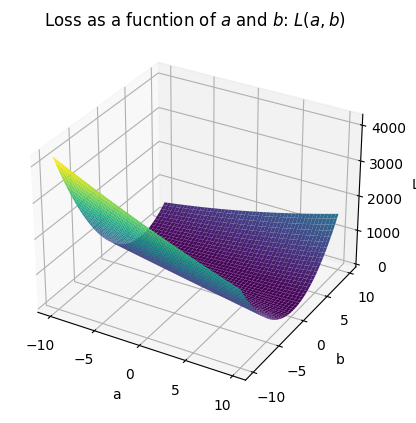

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Grid
a_values = np.arange(-10, 10, 0.1)
b_values = np.arange(-10, 10, 0.1)
A, B = np.meshgrid(a_values, b_values)
Loss = np.vectorize(loss_function)(A, B)

# Plot
fig = plt.figure()
# plt.rcParams["figure.figsize"] = (20,10)
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(A, B, Loss, cmap='viridis')
ax.set_xlabel('a')
ax.set_ylabel('b')
ax.set_zlabel('L')
ax.set_title("Loss as a fucntion of $a$ and $b$: $L(a,b)$")
plt.show()

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D


# Loss function
def loss_function(a, b):
    return np.mean((a + b * x - y) ** 2)

def grad_descent(x,y, STEPS=50):
  # Gradient of loss function
  def gradient(a, b):
      da = 2 * np.mean((a + b * x - y))
      db = 2 * np.mean((a + b * x - y) * x)
      return da, db

  # Gradient descent
  a, b = 10, 10
  learning_rate = 0.01
  steps = STEPS
  a_values, b_values, loss_values = [a], [b], [loss_function(a, b)]
  for _ in range(steps):
      da, db = gradient(a, b)
      a -= learning_rate * da
      b -= learning_rate * db
      a_values.append(a)
      b_values.append(b)
      L = loss_function(a, b)
      loss_values.append(L)

  # Grid
  A, B = np.meshgrid(np.arange(-10, 10, 0.1), np.arange(-10, 10, 0.1))
  Loss = np.vectorize(loss_function)(A, B)

  # Plot
  fig = plt.figure()
  ax = fig.add_subplot(111, projection='3d')
  ax.plot_surface(A, B, Loss, cmap='viridis', alpha=0.5)
  ax.scatter(a_values, b_values, loss_values, color='red', s=10)
  ax.set_xlabel('a')
  ax.set_ylabel('b')
  ax.set_zlabel('L')
  ax.set_title("Loss as a fucntion of $a$ and $b$: $L(a,b)$")

  plt.show()
  return a_values, b_values, loss_values


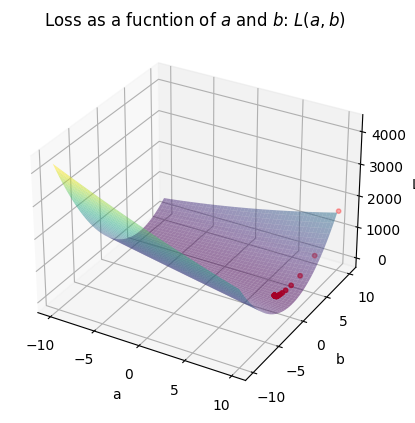

,method,a,b,L,iterations,time
0,Normal_Eq,4.000000,2.000000,2.502267e-28,NA,0.002386
1,Calculus_and_SLE_Based_Sol,4.000000,2.000000,2.051038e-29,NA,0.001489
2,Gradient_Desc_Sol,7.669334,1.181466,1.273343e+00,50,1.136777


In [ ]:
Steps = 50

start_time = time.time()
a_values, b_values, loss_values = grad_descent(x,y, STEPS=Steps)
end_time = time.time()

res.loc[res_ix] = ['Gradient_Desc_Sol', a_values[-1], b_values[-1], loss_function(a_values[-1], b_values[-1]), Steps, end_time-start_time]
res_ix+=1
res

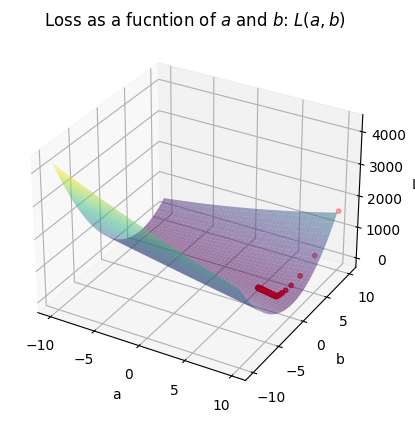

,method,a,b,L,iterations,time
0,Normal_Eq,4.000000,2.000000,2.502267e-28,NA,0.002386
1,Calculus_and_SLE_Based_Sol,4.000000,2.000000,2.051038e-29,NA,0.001489
2,Gradient_Desc_Sol,7.669334,1.181466,1.273343e+00,50,1.136777
3,Gradient_Desc_Sol,5.629809,1.636431,2.512142e-01,500,1.141663


In [ ]:
Steps = 500

start_time = time.time()
a_values, b_values, loss_values = grad_descent(x,y, STEPS=Steps)
end_time = time.time()

res.loc[res_ix] = ['Gradient_Desc_Sol', a_values[-1], b_values[-1], loss_function(a_values[-1], b_values[-1]), Steps, end_time-start_time]
res_ix+=1
res

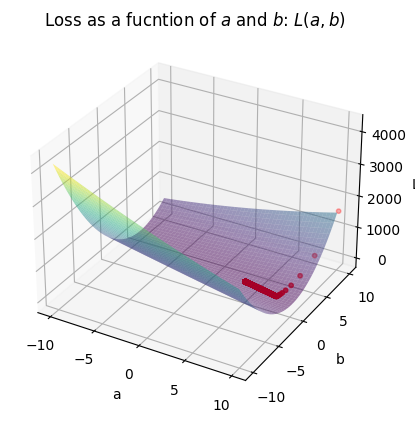

,method,a,b,L,iterations,time
0,Normal_Eq,4.000000,2.000000,2.502267e-28,NA,0.002386
1,Calculus_and_SLE_Based_Sol,4.000000,2.000000,2.051038e-29,NA,0.001489
2,Gradient_Desc_Sol,7.669334,1.181466,1.273343e+00,50,1.136777
3,Gradient_Desc_Sol,5.629809,1.636431,2.512142e-01,500,1.141663
4,Gradient_Desc_Sol,4.000487,1.999891,2.244051e-08,5000,1.298363


In [ ]:
Steps = 5000

start_time = time.time()
a_values, b_values, loss_values = grad_descent(x,y, STEPS=Steps)
end_time = time.time()

res.loc[res_ix] = ['Gradient_Desc_Sol', a_values[-1], b_values[-1], loss_function(a_values[-1], b_values[-1]), Steps, end_time-start_time]
res_ix+=1
res



In [ ]:
d=pd.DataFrame({'a (intercept aka w0)':a_values, 'b (slope aka w1)':b_values, 'Loss':loss_values})

print(d.head(n=2))
d.tail(n=2)

   a (intercept aka w0)  b (slope aka w1)         Loss
0             10.000000         10.000000  1603.595714
1              9.227368          6.570485   606.077584


,a (intercept aka w0),b (slope aka w1),Loss
4999,4.000488,1.999891,2.252160e-08
5000,4.000487,1.999891,2.244051e-08


# Neural Network Solution

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

def NN_solution(x,y, EPOCHS=50):
  N=len(x)
  z = np.zeros(N)
  # z = np.ones(N)
  generated_inputs = np.column_stack((z,x))
  generated_target = y
  input_size=2
  output_size=1
  model = tf.keras.Sequential([
                              tf.keras.layers.Dense(output_size)
                              ])
  custom_optimizer=tf.keras.optimizers.SGD(learning_rate=0.01)
  model.compile(optimizer=custom_optimizer,loss='mean_squared_error')

  model.fit( generated_inputs,
            generated_target,
            epochs=EPOCHS,
            verbose=0)

  weights=model.layers[0].get_weights()[0]
  w1 = weights[1]
  w0 = bias=model.layers[0].get_weights()[1]
  print(f'w0 (intercept) = {bias}')
  print(f'w1 (slope) = {weights[1]}')

  return model, w0, w1

In [ ]:
# w_hat = find_LinAlg_solution(x,y)
# a,b = get_calculus_solution(x,y)

In [ ]:
# %%time
# Steps=5000
# a_values, b_values, loss_values = grad_descent(x,y, STEPS=Steps)
# print(f'GradDesc: a={a_values[-1]},   b={b_values[-1]},    STEPS={Steps}')

In [ ]:
Steps = 50
start_time = time.time()
model, w0, w1 = NN_solution(x,y,EPOCHS=Steps)
end_time = time.time()
res.loc[res_ix] = ['fcNN', w0[0], w1[0], loss_function(w0,w1), Steps, end_time-start_time]
res_ix+=1
res

w0 (intercept) = [1.1564564]
w1 (slope) = [2.6343217]


,method,a,b,L,iterations,time
0,Normal_Eq,4.000000,2.000000,2.502267e-28,NA,0.002386
1,Calculus_and_SLE_Based_Sol,4.000000,2.000000,2.051038e-29,NA,0.001489
2,Gradient_Desc_Sol,7.669334,1.181466,1.273343e+00,50,1.136777
3,Gradient_Desc_Sol,5.629809,1.636431,2.512142e-01,500,1.141663
4,Gradient_Desc_Sol,4.000487,1.999891,2.244051e-08,5000,1.298363
5,fcNN,1.156456,2.634322,7.646991e-01,50,0.537067


In [ ]:
Steps = 500
start_time = time.time()
model, w0, w1 = NN_solution(x,y,EPOCHS=Steps)
end_time = time.time()
res.loc[res_ix] = ['fcNN', w0[0], w1[0], loss_function(w0,w1), Steps, end_time-start_time]
res_ix += 1
res

w0 (intercept) = [2.7261667]
w1 (slope) = [2.2841597]


,method,a,b,L,iterations,time
0,Normal_Eq,4.000000,2.000000,2.502267e-28,NA,0.002386
1,Calculus_and_SLE_Based_Sol,4.000000,2.000000,2.051038e-29,NA,0.001489
2,Gradient_Desc_Sol,7.669334,1.181466,1.273343e+00,50,1.136777
3,Gradient_Desc_Sol,5.629809,1.636431,2.512142e-01,500,1.141663
4,Gradient_Desc_Sol,4.000487,1.999891,2.244051e-08,5000,1.298363
5,fcNN,1.156456,2.634322,7.646991e-01,50,0.537067
6,fcNN,2.726167,2.284160,1.534603e-01,500,3.066166


In [ ]:
Steps = 5000
start_time = time.time()
model, w0, w1 = NN_solution(x,y,EPOCHS=Steps)
end_time = time.time()
res.loc[res_ix] = ['fcNN', w0[0], w1[0], loss_function(w0,w1), Steps, end_time-start_time]
res_ix += 1
res

w0 (intercept) = [3.9996107]
w1 (slope) = [2.0000868]


,method,a,b,L,iterations,time
0,Normal_Eq,4.000000,2.000000,2.502267e-28,NA,0.002386
1,Calculus_and_SLE_Based_Sol,4.000000,2.000000,2.051038e-29,NA,0.001489
2,Gradient_Desc_Sol,7.669334,1.181466,1.273343e+00,50,1.136777
3,Gradient_Desc_Sol,5.629809,1.636431,2.512142e-01,500,1.141663
4,Gradient_Desc_Sol,4.000487,1.999891,2.244051e-08,5000,1.298363
5,fcNN,1.156456,2.634322,7.646991e-01,50,0.537067
6,fcNN,2.726167,2.284160,1.534603e-01,500,3.066166
7,fcNN,3.999611,2.000087,1.433488e-08,5000,13.815161


In [ ]:
model.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_9 (Dense)             (None, 1)                 3         
                                                                 
Total params: 3
Trainable params: 3
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# weights=model.layers[0].get_weights()[0]
#   w1 = weights[1]
#   w0 = bias=model.layers[0].get_weights()[1]
#   print(f'w0 (intercept) = {bias}')
#   print(f'w1 (slope) = {weights[1]}')

In [ ]:
model.layers[0].get_weights()

[array([[0.01380861],
        [2.0000868 ]], dtype=float32),
 array([3.9996107], dtype=float32)]

In [ ]:
print(x)
print(y)

[2.08299323 2.67247721 3.07063623 3.13688868 3.74846941 3.98480935
 4.76398912 5.34806544 5.96618635 6.01499674]
[ 8.16598646  9.34495442 10.14127246 10.27377737 11.49693881 11.96961869
 13.52797824 14.69613089 15.93237269 16.02999347]


# Summary

In [ ]:
res

,method,a,b,L,iterations,time
0,Normal_Eq,4.000000,2.000000,2.502267e-28,NA,0.002386
1,Calculus_and_SLE_Based_Sol,4.000000,2.000000,2.051038e-29,NA,0.001489
2,Gradient_Desc_Sol,7.669334,1.181466,1.273343e+00,50,1.136777
3,Gradient_Desc_Sol,5.629809,1.636431,2.512142e-01,500,1.141663
4,Gradient_Desc_Sol,4.000487,1.999891,2.244051e-08,5000,1.298363
5,fcNN,1.156456,2.634322,7.646991e-01,50,0.537067
6,fcNN,2.726167,2.284160,1.534603e-01,500,3.066166
7,fcNN,3.999611,2.000087,1.433488e-08,5000,13.815161


# STOP-STOP-STOP

In [4]:
def generate_data(w=[4,2,7] , N=10, addnoise=True):
  # parameters

  # Fixing random state for reproducibility
  np.random.seed(9)

  # domain [2,10]
  x = 2 + (10-2)*np.random.random_sample(size=N)
  x = np.sort(x)

  # values
  a, b, c = w[0], w[1], w[2]
  y = a + b*x +c*x**2
  if addnoise:
    noise = np.random.random_sample(size=N)
    y = y + noise


  # x = np.array([1, 1.5, 6, 2, 3])
  # y = np.array([4, 7, 12, 8, 7])
  # N = len(x)

  import matplotlib.pyplot as plt
  # plt.scatter(x, y, s=100*noise, marker='o', c='red', alpha=0.5)
  plt.scatter(x, y, s=100, marker='o', c='red', alpha=0.5)
  plt.xlabel('x', size=20)
  plt.ylabel('y', size=20)
  plt.grid()

  return x, y

(array([2.08299323, 2.67247721, 3.07063623, 3.13688868, 3.74846941,
        3.98480935, 4.76398912, 5.34806544, 5.96618635, 6.01499674]),
 array([ 38.70478841,  60.21845454,  77.09388457,  79.19302004,
        110.55320636, 123.69331725, 173.29513173, 215.57565782,
        265.647867  , 269.99372114]))

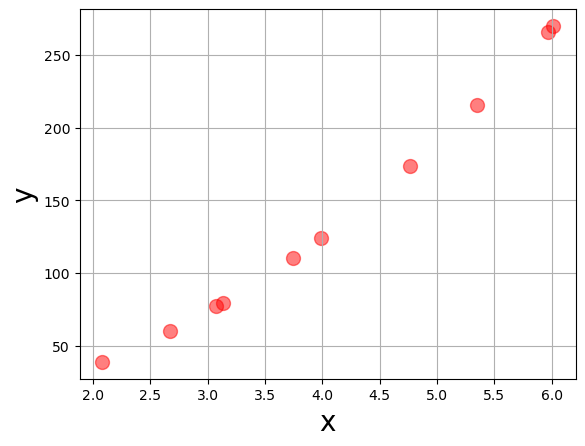

In [5]:
generate_data(w=[4,2,7] , N=10, addnoise=True)

# NN Solution

https://www.analyticsvidhya.com/blog/2021/06/linear-regression-using-neural-networks/

Here, we’re using two input variables xs and zs, adding some noise to randomly spread the data points, and finally, the target variable is defined as y=2*xs-3*zs+5+noise. The size of the dataset is 1000.

# LA approach: Normal Equation.

https://godatadriven.com/blog/the-linear-algebra-behind-linear-regression/

## Model $y = a + b x + c x^2 =
 [a,b,c]\cdot [1, x, x^2]^T =
 \vec{w}\cdot \vec{x}^T$

Here $\vec{w} =[a,b,c]$,  $\vec{x}=[1, x, x^2]$.
Experimental data : $y_i = \vec{w}\cdot \vec{x}_i^T$ for $i=0,...,N$.

Let $X =[ \vec{x}_0, \vec{x}_1, ..., \vec{x}_N]$ be $(N+1)$ by 3 matrix.

Let us use the following notation
 $\vec{w}=[w_0, w_1, w_0]^T$ ,
 $\vec{y}=[y_0,...,y_N]^T$,
 $\vec{n}=[n_0,...,n_N]^T$  .

 Then $\vec{y} =  X\vec{w} + \vec{n}$

We want to find a vector $\hat{y}=X\hat{w}$ in subspace $span\{ X\}$ closest to $y$.

It is clear that $y-X\hat{w}$ is orthogonal to $span\{ X\}$, hence
$$ (y-X\hat{w} )^T X=0 $$
$$ X^T (y-X\hat{w} )=0 $$
$$ X^T y=X^T X\hat{w} $$
$$ \hat{w} = (X^T X)^{-1}X^T y $$


In [ ]:
def replace_latex_symbols(text):
    text = text.replace('\\(', '$')
    text = text.replace('\\)', '$')
    text = text.replace('\\[', '$$')
    text = text.replace('\\]', '$$')
    return text

In [ ]:
Reference: BUAN 6382.SW1.S24 course by Dr Farid Khafizov at Naveen Jindal School to Management, UTDallas.